# Logistic Regression

- It is a type of Regression Machine Learning Algorithms being deployed to solve Classification Problems/categorical,Problems having binary outcomes, such as Yes/No, 0/1, True/False, are the ones being called classification problems.

- Linear regression doesn’t give a good fit line for the problems having only two values(being shown in the figure), It will give less accuracy while prediction because it will fail to cover the datasets, being linear in nature.

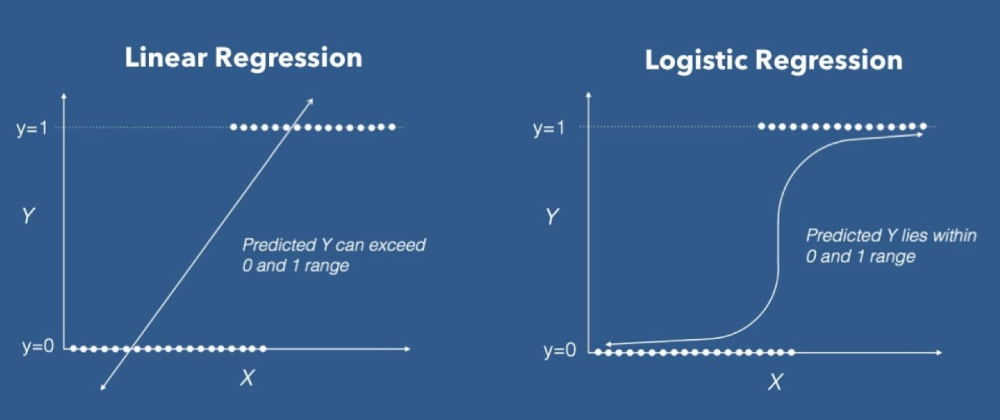

In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
# Loading dataset
df=pd.read_csv('Banking.csv')
#looking for first 5 rows of dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
#looking summary of dataset
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [4]:
# lets look at dataype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

## Performing Exploratory data analysis:
1. Checking various null entries in the dataset, with the help of heatmap/and isnull()

2. Visualization of various relationships between variables


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


<AxesSubplot:>

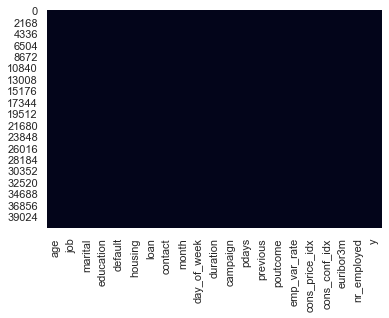

In [5]:
#lets look for missing values 
print(df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False)

In [6]:
# lets look at our output varaibles 
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

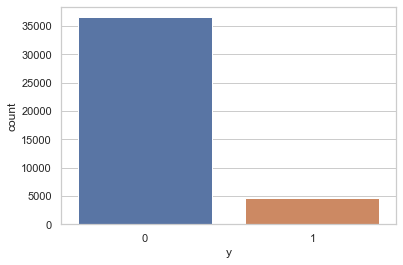

In [7]:
sns.countplot(df.y)

In [8]:
#lets looks how many 1 and 0 in dataset
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

By looking above figure we could say that dataset is imbalance, The ratio of 1 as comapred to 0 is very less

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job', ylabel='count'>

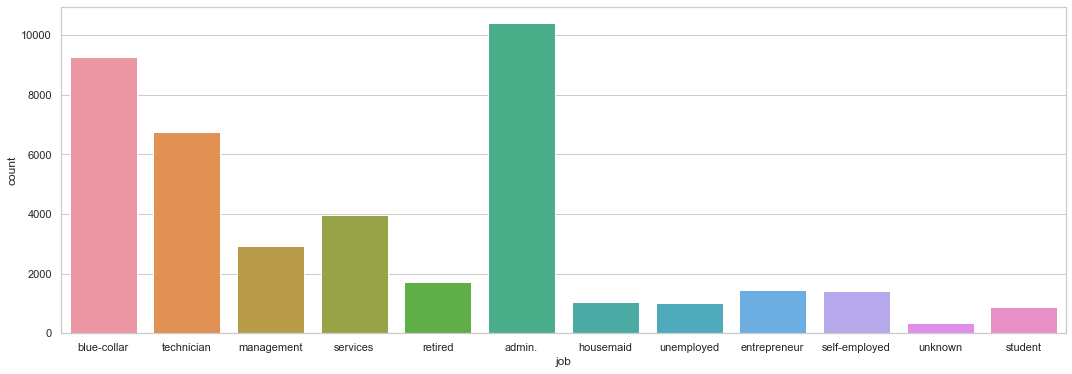

In [9]:
plt.figure(figsize=(18,6))
sns.countplot(df.job)


Client will subscribe to a term deposit are admin,blue-collar,technician,service people.

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

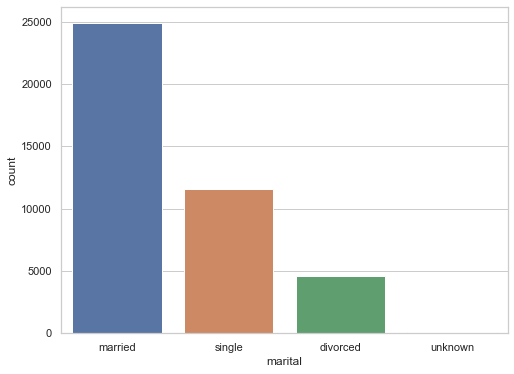

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(df.marital)

Client will subscribe to a term deposit are married people.

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

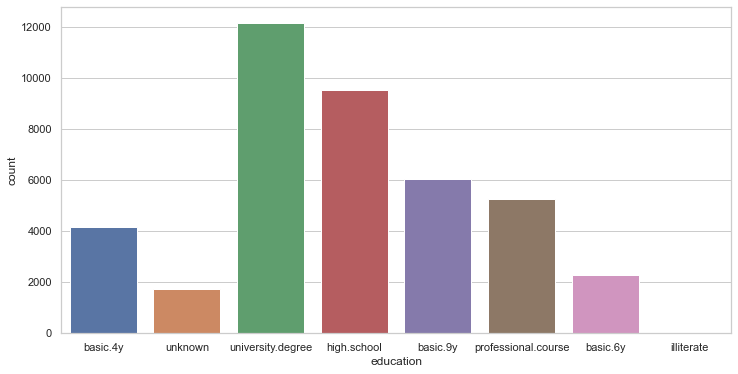

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(df.education)

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default', ylabel='count'>

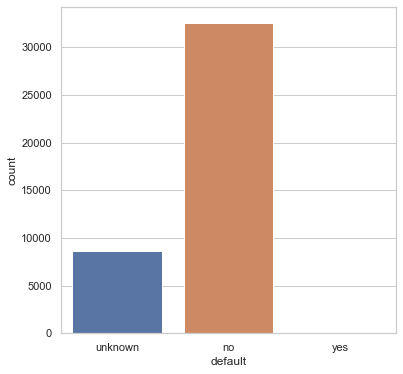

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(df.default)

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='housing', ylabel='count'>

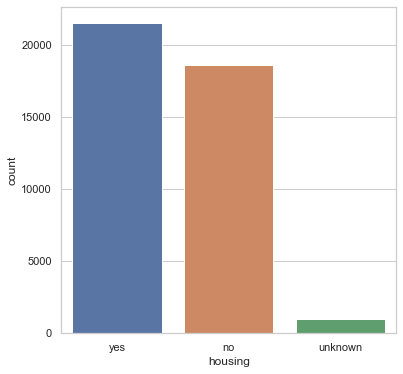

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(df.housing)

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan', ylabel='count'>

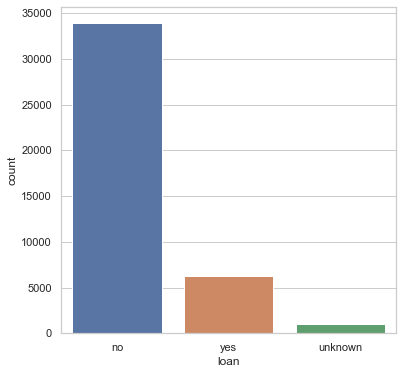

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(df.loan)

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='contact', ylabel='count'>

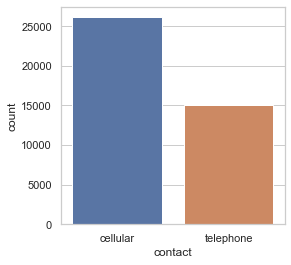

In [15]:
plt.figure(figsize=(4,4))
sns.countplot(df.contact)

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

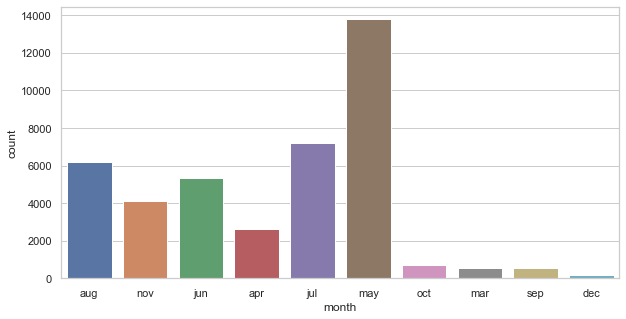

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(df.month)

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day_of_week', ylabel='count'>

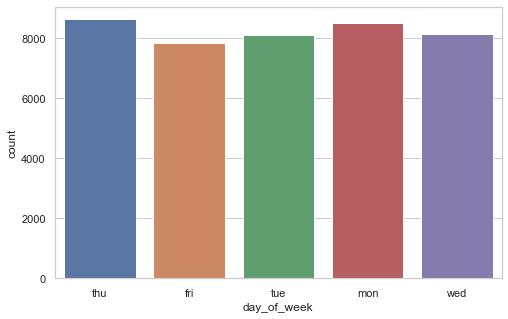

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(df.day_of_week)

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration'>

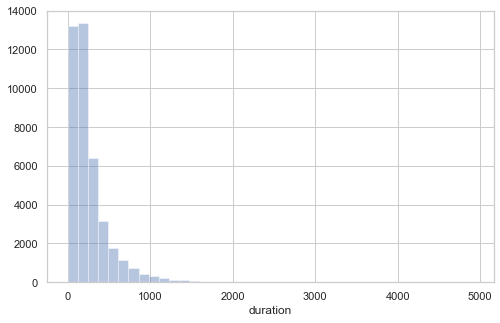

In [18]:
plt.figure(figsize=(8,5))
sns.distplot(df.duration,kde=False,bins=40)

In [19]:
df.campaign.value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
26        8
28        8
25        8
30        7
31        7
35        5
33        4
32        4
34        3
43        2
42        2
40        2
41        1
56        1
39        1
37        1
Name: campaign, dtype: int64

<AxesSubplot:xlabel='campaign'>

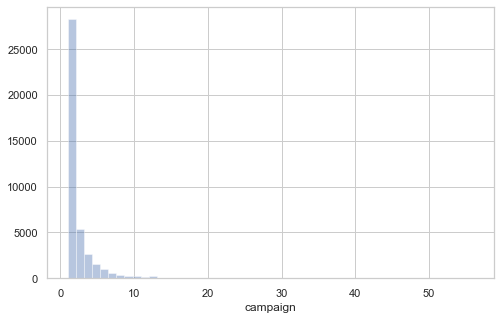

In [20]:
plt.figure(figsize=(8,5))
sns.distplot(df.campaign,kde=False)

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='poutcome', ylabel='count'>

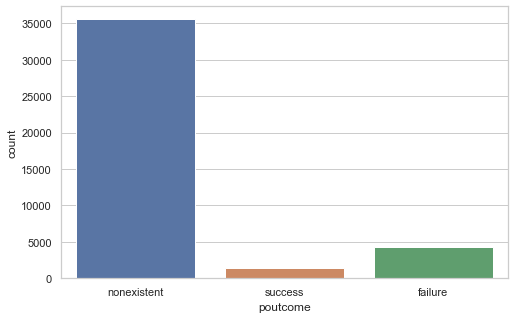

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(df.poutcome)

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='previous', ylabel='count'>

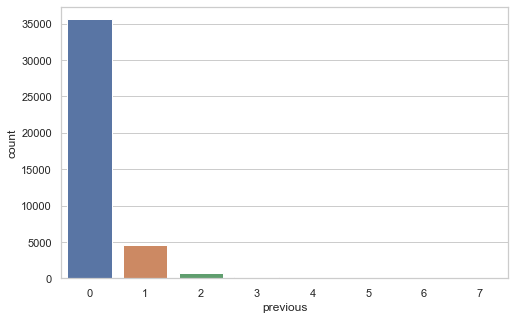

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(df.previous)

### Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

- Nominal data --> data are not in any order --> OneHotEncoder is used in this case
- Ordinal data --> data are in order --> LabelEncoder is used in this case

In [23]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [24]:
X= df.iloc[:,:-1] #Independent features
y= df.iloc[:,-1]
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2


In [25]:
cat_cols=X[['job','marital','default','housing','loan','contact','month','day_of_week','poutcome']]
cat_cols=pd.get_dummies(cat_cols,drop_first=True)
cat_cols.head()


,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
X.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [27]:
X.education.replace({'illiterate':0,'unknown':1,'basic.4y':2,'basic.6y':3,'basic.9y':4,'high.school':5,'professional.course':6,
          'university.degree':7},inplace=True)

In [28]:
X=pd.concat([X,cat_cols],axis=1)

In [29]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,2,unknown,yes,no,cellular,aug,thu,...,0,0,0,0,0,1,0,0,1,0
1,53,technician,married,1,no,no,no,cellular,nov,fri,...,0,1,0,0,0,0,0,0,1,0
2,28,management,single,7,no,yes,no,cellular,jun,thu,...,0,0,0,0,0,1,0,0,0,1
3,39,services,married,5,no,no,no,cellular,apr,fri,...,0,0,0,0,0,0,0,0,1,0
4,55,retired,married,2,no,yes,no,cellular,aug,fri,...,0,0,0,0,0,0,0,0,0,1


In [30]:
cat_cols1=df[['job','marital','default','housing','loan','contact','month','day_of_week','poutcome']]
X=X.drop(cat_cols1,axis=1)
X.head()

,age,education,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,2,210,1,999,0,1.4,93.444,-36.1,4.963,...,0,0,0,0,0,1,0,0,1,0
1,53,1,138,1,999,0,-0.1,93.200,-42.0,4.021,...,0,1,0,0,0,0,0,0,1,0
2,28,7,339,3,6,2,-1.7,94.055,-39.8,0.729,...,0,0,0,0,0,1,0,0,0,1
3,39,5,185,2,999,0,-1.8,93.075,-47.1,1.405,...,0,0,0,0,0,0,0,0,1,0
4,55,2,137,1,3,1,-2.9,92.201,-31.4,0.869,...,0,0,0,0,0,0,0,0,0,1


In [31]:
X.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
20         1
25         1
26         1
27         1
Name: pdays, dtype: int64

In [32]:
# since most of data are missing in pdays columns so, we will drop it
X.drop(['pdays'],axis=1,inplace=True)

In [33]:
X.head()

,age,education,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,2,210,1,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,1,0,0,1,0
1,53,1,138,1,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,0,0,0,0,0,1,0
2,28,7,339,3,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,0,1,0,0,0,1
3,39,5,185,2,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,0,0,0,0,0,1,0
4,55,2,137,1,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,0,0,0,0,0,1


### Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,
- Correlation
- Chi2 test

In [34]:
cnt_cols=X[['age','duration','emp_var_rate','cons_price_idx','euribor3m','nr_employed']]
cnt_cols.corr()


,age,duration,emp_var_rate,cons_price_idx,euribor3m,nr_employed
age,1.000000,-0.000866,-0.000371,0.000857,0.010767,-0.017725
duration,-0.000866,1.000000,-0.027968,0.005312,-0.032897,-0.044703
emp_var_rate,-0.000371,-0.027968,1.000000,0.775334,0.972245,0.906970
cons_price_idx,0.000857,0.005312,0.775334,1.000000,0.688230,0.522034
euribor3m,0.010767,-0.032897,0.972245,0.688230,1.000000,0.945154
nr_employed,-0.017725,-0.044703,0.906970,0.522034,0.945154,1.000000


<AxesSubplot:>

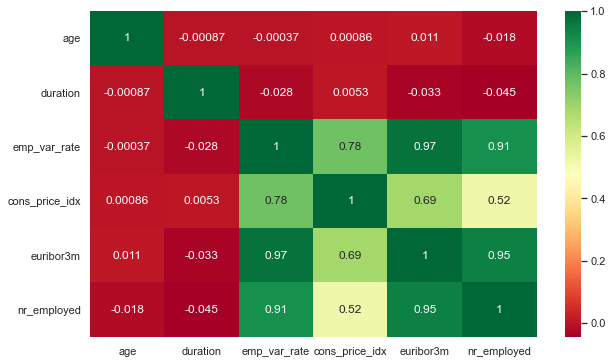

In [35]:
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(cnt_cols.corr(),annot = True, cmap = "RdYlGn")

In [36]:
threshold=0.90
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [37]:
correlation(cnt_cols,threshold)

{'euribor3m', 'nr_employed'}

In [38]:
X.drop(['euribor3m', 'nr_employed'],axis=1,inplace=True)

In [39]:
X.head()

,age,education,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,2,210,1,0,1.4,93.444,-36.1,1,0,...,0,0,0,0,0,1,0,0,1,0
1,53,1,138,1,0,-0.1,93.200,-42.0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,28,7,339,3,2,-1.7,94.055,-39.8,0,0,...,0,0,0,0,0,1,0,0,0,1
3,39,5,185,2,0,-1.8,93.075,-47.1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,55,2,137,1,1,-2.9,92.201,-31.4,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
# For categorical ----- categorical -----> chi2 test
from sklearn.feature_selection import chi2

In [41]:
X.columns


Index(['age', 'education', 'duration', 'campaign', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'default_unknown', 'default_yes', 'housing_unknown',
       'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [42]:
chi_catcols= X[[ 'education', 'campaign', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'default_unknown', 'default_yes', 'housing_unknown',
       'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success']]

In [43]:
#chi score
chi_scores = chi2(chi_catcols,y)

In [44]:
chi_scores

(array([3.47588456e+01, 5.41971889e+02, 3.09017243e+03, 1.76876859e+02,
        1.10065113e+01, 1.69798200e+00, 6.71324420e-03, 3.35662863e+02,
        8.64507734e-01, 3.88322963e+01, 3.55864620e+02, 1.30221961e+00,
        8.74260253e+00, 9.37694452e-04, 3.06235474e+01, 8.67995049e+01,
        1.11617940e+00, 3.21320431e+02, 3.80868994e-01, 2.07141139e-01,
        2.70442815e+00, 2.07141139e-01, 6.96920402e-01, 5.47958309e+02,
        2.71895595e+00, 2.57887787e+02, 3.53330416e+01, 3.02405272e+00,
        8.42916583e+02, 3.21423320e+02, 5.16043932e+00, 7.63644573e+02,
        6.45541017e+02, 1.47750439e+01, 6.28141343e+00, 2.14277851e+00,
        1.31274314e+00, 2.10627558e+02, 3.98254806e+03]),
 array([3.73179259e-009, 7.02188336e-120, 0.00000000e+000, 2.33002751e-040,
        9.07923726e-004, 1.92552099e-001, 9.34698887e-001, 5.61615944e-075,
        3.52480301e-001, 4.61823393e-010, 2.23905829e-079, 2.53808184e-001,
        3.10860535e-003, 9.75571159e-001, 3.13268588e-008, 1.20099

In [45]:
#here first array represents chi square values and second array represnts p-values
p_values = pd.Series(chi_scores[1],index = chi_catcols.columns)
p_values.sort_values(ascending = False , inplace = True)

<AxesSubplot:>

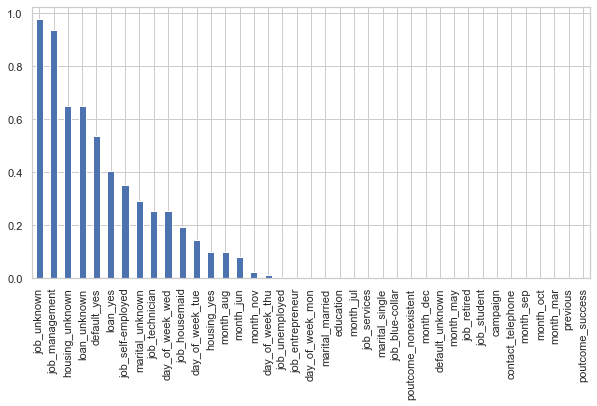

In [46]:
plt.figure(figsize=(10,5))
p_values.plot.bar()

Since some of the column has higher the p-value, it says that this variables is independent of the repsone and can not be considered for model training.

In [47]:
X.drop(['job_unknown','housing_unknown','job_management','loan_unknown','default_yes','loan_yes','marital_unknown','job_self-employed',
       'job_technician','day_of_week_tue', 'day_of_week_wed','job_housemaid','month_jun','month_aug','month_nov'],axis=1,inplace=True)

In [48]:
X.head()

,age,education,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,job_blue-collar,job_entrepreneur,...,month_dec,month_jul,month_mar,month_may,month_oct,month_sep,day_of_week_mon,day_of_week_thu,poutcome_nonexistent,poutcome_success
0,44,2,210,1,0,1.4,93.444,-36.1,1,0,...,0,0,0,0,0,0,0,1,1,0
1,53,1,138,1,0,-0.1,93.200,-42.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,28,7,339,3,2,-1.7,94.055,-39.8,0,0,...,0,0,0,0,0,0,0,1,0,1
3,39,5,185,2,0,-1.8,93.075,-47.1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,55,2,137,1,1,-2.9,92.201,-31.4,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(cnt_cols, y)

ExtraTreesClassifier()

In [50]:
print(selection.feature_importances_)

[0.18320147 0.50410434 0.04162229 0.03221583 0.17071883 0.06813724]


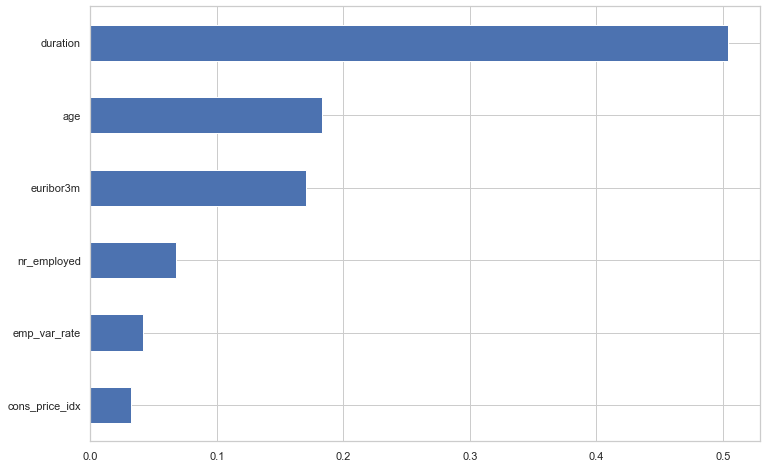

In [51]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=cnt_cols.columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()

## Fitting model using Logistic Regression
1. Split dataset into train and test set in order to prediction w.r.t X_test
2. Scaling is required in logistic regression
3. Oversampling with smote
4. Import model
5. Fit the data
6. Predict w.r.t X_test
7. In classification we check accuracy Score
8. Plot error graph

In [52]:
#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

<IPython.core.display.Javascript object>

In [53]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
### fit vs fit_transform
X_train_scaled=scaler.fit_transform(X_train) #alway give parameter in fit_transform

In [54]:
X_test_scaled=scaler.transform(X_test)

In [55]:
# import SMOTE oversampling and other necessary libraries 
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [56]:
# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train_scaled, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

Before oversampling:  Counter({0: 25567, 1: 3264})
After oversampling:  Counter({0: 25567, 1: 25567})


In [57]:
# Building the model
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train_SMOTE,y_train_SMOTE)


LogisticRegression()

In [58]:
# predicting the model
y_pred=clf.predict(X_test_scaled)

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print('The Model accuracy is',accuracy)
report= classification_report(y_test,y_pred)
print(report)


[[9466 1515]
 [ 174 1202]]
The Model accuracy is 0.8633163389172129
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     10981
           1       0.44      0.87      0.59      1376

    accuracy                           0.86     12357
   macro avg       0.71      0.87      0.75     12357
weighted avg       0.92      0.86      0.88     12357



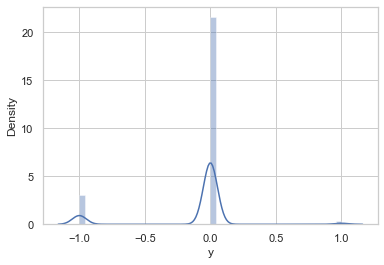

In [60]:
sns.distplot(y_test-y_pred)
plt.show()

In [61]:
# building model by Random forest
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_SMOTE,y_train_SMOTE)

RandomForestClassifier()

In [62]:
y_pred=classifier.predict(X_test_scaled)

In [63]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print('The Model accuracy is',accuracy)
report= classification_report(y_test,y_pred)
print(report)

[[10288   693]
 [  450   926]]
The Model accuracy is 0.9075018208302986
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     10981
           1       0.57      0.67      0.62      1376

    accuracy                           0.91     12357
   macro avg       0.77      0.80      0.78     12357
weighted avg       0.92      0.91      0.91     12357



## Statistic Model

In [64]:
# Import library
import statsmodels.api as sm

#adding constant term
x_train=sm.add_constant(X_train)
x_test=sm.add_constant(X_test)

In [65]:
model_train=sm.OLS(y_train,x_train).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     532.7
Date:                Tue, 21 Sep 2021   Prob (F-statistic):               0.00
Time:                        16:34:57   Log-Likelihood:                -1583.3
No. Observations:               28831   AIC:                             3227.
Df Residuals:                   28801   BIC:                             3475.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -12.9321      0.531    -24.350      0.000     -13.973     -11.891
age                   6.928e-05      0.000      0.374      0.708      -0.000       0.000
education                0.0013      0.001      1.284      0.199      -0.001       0.003
duration                 0.0005   5.82e-06     79.533      0.000       0.000       0.000
campaign                 0.0010      0.001      1.812      0.070   -8.23e-05       0.002
previous                 0.0119      0.007      1.712      0.087      -0.002       0.026
emp_var_rate            -0.0902      0.002    -43.517      0.000      -0.094      -0.086
cons_price_idx           0.1419      0.006     24.601      0.000       0.131       0.153
cons_conf_idx            0.0093      0.000     22.620      0.000       0.009       0.010
job_blue-collar         -0.0152      0.004     -3.400      0.001      -0.024      -0.006
job_entrepreneur        -0.0128      0.008     -1.520      0.129      -0.029       0.004
job_retired              0.0318      0.009      3.669      0.000       0.015       0.049
job_services            -0.0094      0.005     -1.742      0.081      -0.020       0.001
job_student              0.0441      0.011      3.894      0.000       0.022       0.066
job_unemployed           0.0003      0.010      0.033      0.974      -0.019       0.019
marital_married          0.0008      0.005      0.156      0.876      -0.009       0.010
marital_single           0.0054      0.006      0.941      0.347      -0.006       0.017
default_unknown         -0.0128      0.004     -3.229      0.001      -0.021      -0.005
housing_yes             -0.0016      0.003     -0.514      0.607      -0.007       0.004
contact_telephone       -0.0596      0.005    -11.678      0.000      -0.070      -0.050
month_dec               -0.0233      0.022     -1.040      0.298      -0.067       0.021
month_jul                0.0176      0.005      3.608      0.000       0.008       0.027
month_mar                0.2272      0.013     16.881      0.000       0.201       0.254
month_may               -0.0533      0.004    -13.851      0.000      -0.061      -0.046
month_oct                0.0158      0.013      1.248      0.212      -0.009       0.040
month_sep                0.0106      0.014      0.756      0.450      -0.017       0.038
day_of_week_mon         -0.0159      0.004     -4.092      0.000      -0.023      -0.008
day_of_week_thu         -0.0025      0.004     -0.649      0.516      -0.010       0.005
poutcome_nonexistent     0.0518      0.010      5.342      0.000       0.033       0.071
poutcome_success         0.3135      0.010     30.768      0.000       0.293       0.333
==============================================================================
Omnibus:                     6745.506   Durbin-Watson:             